In [1]:
import sys

import numpy as np
import pandas as pd

import time
from datetime import datetime, timedelta

from operator import itemgetter
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 80) 

In [2]:
df_clients = pd.read_csv("./data/df_clients_08_3.csv", sep=',', encoding='utf-8')
df_clients.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,PCL_lgbm,PCL_xgb,PCL_random_forest,PCL_logreg,PCL_catboost,Y_pred
0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.500000,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.0,0,0,0,0,0,0.540747,0.691848,0.150000,0.515698,0.214022,0.134674
1,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.250000,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.0,0,0,0,0,0,0.963965,0.998813,0.903333,0.948844,0.901804,0.700835
2,0.0,0.0,0.0,0.0,10.763,10.782968,11.231806,9.80669,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,12.048980,9.806690,0.000000,0.0,189077.720000,7.503290,2.430098,18.467791,11.436245,12.149919,9.343997,6.986053,-319237.720000,-1882.561297,8.364275,6.978680,11.671427,11.408288,8.600799,6.809959,0.000000,...,11.827013,0.000000,8.967632,10.256703,6.215616,10.475268,6.949839,9.637893,7.073726,0.033333,2.177778,2.211111,164.095477,24.412200,90,2,47269.430000,3.037480,22.500000,6.428571,1.363636,-0.116983,0.094044,-0.140983,0.131165,-3547.085778,0,NaN,NaN,0,0,0,0,0,0.959344,0.992874,0.907778,0.910438,0.964070,0.955691
3,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,10.829107,10.699439,9.968908,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,11.66

In [3]:
df_clients["target_sum"] = np.log(1.0 + df_clients["target_sum"])

In [4]:
df_clients.drop(filter(lambda s: s.startswith("PCL_"), df_clients.columns),
                inplace=True, axis=1)
df_clients.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.500000,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.0,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.250000,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.0,0,0,0,0,0,0.700835
2,0.0,0.0,0.0,0.0,10.763,10.782968,11.231806,9.80669,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,12.048980,9.806690,0.000000,0.0,189077.720000,7.503290,2.430098,18.467791,11.436245,12.149919,9.343997,6.986053,-319237.720000,-1882.561297,8.364275,6.978680,11.671427,11.408288,8.600799,6.809959,0.000000,...,10.475268,10.256703,7.296617,0.000000,7.003974,11.827013,0.000000,8.967632,10.256703,6.215616,10.475268,6.949839,9.637893,7.073726,0.033333,2.177778,2.211111,164.095477,24.412200,90,2,47269.430000,3.037480,22.500000,6.428571,1.363636,-0.116983,0.094044,-0.140983,0.131165,-3547.085778,0,NaN,NaN,0,0,0,0,0,0.955691
3,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,10.829107,10.699439,9.968908,

In [5]:
target = "target_sum"

features = filter(lambda s: s not in {
        "cl_id", "target_flag", "target_sum", "trx_datetime", "channel_type" ,"Y_pred"
    }, df_clients.columns)
features = ['cl_id'] + features

features

['cl_id',
 u'FF_POS_amount_2016-10_log',
 u'FF_POS_amount_2016-11_log',
 u'FF_POS_amount_2016-12_log',
 u'FF_POS_amount_2017-01_log',
 u'FF_POS_amount_2017-02_log',
 u'FF_POS_amount_2017-03_log',
 u'FF_POS_amount_2017-04_log',
 u'FF_POS_amount_2017-05_log',
 u'FF_POS_amount_2017-06_log',
 u'FF_POS_amount_2017-07_log',
 u'FF_POS_amount_2017-08_log',
 u'FF_POS_amount_2017-09_log',
 u'FF_POS_amount_2017-10_log',
 u'FF_POS_amount_2017-11_log',
 u'FF_POS_amount_2017-12_log',
 u'FF_POS_amount_2018-01_log',
 u'FF_POS_amount_2018-02_log',
 u'FF_POS_amount_2018-03_log',
 u'FF_POS_amount_2018-04_log',
 u'FF_POS_amount_quarter1_log',
 u'FF_POS_amount_quarter2_log',
 u'FF_POS_amount_quarter3_log',
 u'FF_POS_amount_quarter4_log',
 u'FF_amount_POS',
 u'FF_amount_POS_div_100_log',
 u'FF_amount_POS_div_100_mean_log',
 u'FF_amount_POS_div_100_std',
 u'FF_amount_POS_last_month_log',
 u'FF_amount_POS_log',
 u'FF_amount_POS_max_log',
 u'FF_amount_POS_mean_log',
 u'FF_amount_balanced',
 u'FF_amount_balance

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFECV

In [7]:
features_remove_cl = dict()

In [8]:
use_positive_class = False

In [9]:
from xgboost import XGBRegressor

In [10]:
mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]
df_clients_train.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.0,0.0,0.0,0.0,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.50,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.000000,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.25,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.000000,0,0,0,0,0,0.700835
5,0.0,0.0,0.0,0.0,0.0,10.853394,11.676312,10.416270,11.417794,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,12.040357,11.730638,0.000000,0.0,293778.468834,7.965893,3.293833,58.777212,11.442013,12.590585,10.936050,7.881429,-261666.848834,-2153.340938,9.466186,7.857057,12.421177,10.864421,9.466186,7.857057,8.110892,...,8.104703,5.513429,7.498316,0.000000,6.268654,12.245298,10.430562,0.000000,10.772384,7.339025,11.289507,8.724708,8.881517,6.803047,0.053763,1.473118,1.526882,209.950704,27.567667,93,5,73444.617208,3.147646,23.25,6.642857,1.550000,-0.115423,0.127715,-0.138852,0.121123,-2813.622030,0,1.0,12.695305,0,0,0,0,0,0.984256
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.059634,7.699430,7.352441,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,9.422

In [11]:
features_remove = set()

In [12]:
features_ = filter(lambda f: f not in features_remove, features)

scores = []
feature_importances = []

kf = KFold(n_splits=5, shuffle=True, random_state=8888)

for train_index, valid_index in kf.split(df_clients_train):
    cl = XGBRegressor(n_estimators=300, max_depth=5, random_state=8888)
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X_valid = df_clients_train.iloc[valid_index].loc[:, features_].values
    Y_valid = df_clients_train.iloc[valid_index].loc[:, target].values
    
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    
    feature_importances.append(cl.feature_importances_)
    scores.append(mean_squared_error(Y_valid, Y_pred))
    print scores[-1]
    
print "=" * 30
print "MEAN:", np.mean(scores)

16.13727516555836
17.144302747684424
15.632434080725881
15.763723425755904
17.047510005033594
MEAN: 16.345049084951633


Feature ranking:
[001] cl_id                                    0.083779245615
[002] FF_amount_log_POS_per_month              0.0170649942011
[003] FF_trxday_std                            0.0159732438624
[004] FF_amount_POS_last_month_log             0.0137490853667
[005] FF_amount_balanced                       0.0129084242508
[006] FF_amount_out_log_per_day                0.0124879935756
[007] FF_amount_POS                            0.0111225368455
[008] FF_amount_wday_4_frac                    0.0110704209656
[009] FF_amount_wday_2_frac                    0.010824601166
[010] FF_amount_log_POS_std                    0.0105220628902
[011] FF_amount_out_mean_log                   0.0103662209585
[012] FF_amount_balanced_mean_window_week      0.0103434855118
[013] FF_amount_out_min_log                    0.0103336479515
[014] FF_amount_holiday_before_7_log           0.0103134531528
[015] FF_amount_out_log                        0.0103096123785
[016] FF_mcc_top2_amount_mean_log       

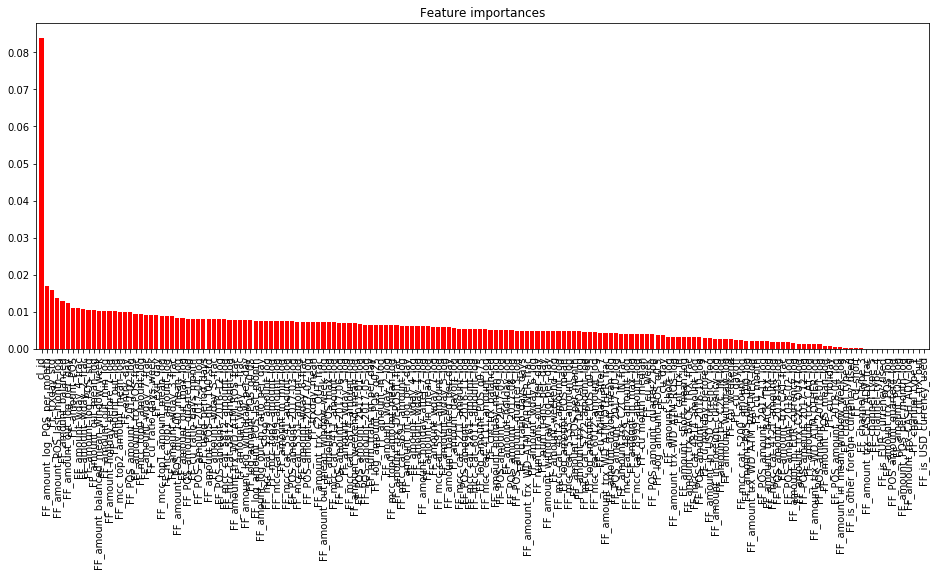

In [13]:
features_ = np.array(features_)

importances = np.mean(feature_importances, axis=0)
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1]

print "Feature ranking:"

n_features = len(features_)

for f in range(n_features):
    print "[{:03}] {:40} {}".format(f + 1, features_[indices[f]], importances[indices[f]])
    
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color="r", align="center")
plt.xticks(range(n_features), features_[indices], rotation='vertical')
plt.xlim([-1, n_features])
plt.show()

In [14]:
features_remove = set(f for f, f_im in zip(features_, importances) if f_im < 5e-4)
features_remove

{u'FF_POS_amount_quarter4_log',
 u'FF_amount_POS_log',
 u'FF_amount_POS_per_month_log',
 u'FF_amount_in_mean_window_week_log',
 u'FF_amount_trx_CASH_ADV_frac',
 u'FF_amount_trx_CASH_ADV_log',
 u'FF_amount_trx_POS_log',
 u'FF_channel_type_1',
 u'FF_channel_type_2',
 u'FF_channel_type_3',
 u'FF_channel_type_4',
 u'FF_channel_type_5',
 u'FF_cnt_trx_out',
 u'FF_cu_short',
 u'FF_is_EUR_currency_used',
 u'FF_is_USD_currency_used',
 u'FF_is_other_foreign_currency_used'}

In [15]:
features_remove_cl['xgb'] = features_remove

In [16]:
import xgboost as xgb

In [17]:
target = "target_sum"

features = filter(lambda s: s not in {
        "cl_id", "target_flag", "target_sum", "trx_datetime", "channel_type", "Y_pred"
    }, df_clients.columns)
features = ["cl_id"] + features

features

['cl_id',
 u'FF_POS_amount_2016-10_log',
 u'FF_POS_amount_2016-11_log',
 u'FF_POS_amount_2016-12_log',
 u'FF_POS_amount_2017-01_log',
 u'FF_POS_amount_2017-02_log',
 u'FF_POS_amount_2017-03_log',
 u'FF_POS_amount_2017-04_log',
 u'FF_POS_amount_2017-05_log',
 u'FF_POS_amount_2017-06_log',
 u'FF_POS_amount_2017-07_log',
 u'FF_POS_amount_2017-08_log',
 u'FF_POS_amount_2017-09_log',
 u'FF_POS_amount_2017-10_log',
 u'FF_POS_amount_2017-11_log',
 u'FF_POS_amount_2017-12_log',
 u'FF_POS_amount_2018-01_log',
 u'FF_POS_amount_2018-02_log',
 u'FF_POS_amount_2018-03_log',
 u'FF_POS_amount_2018-04_log',
 u'FF_POS_amount_quarter1_log',
 u'FF_POS_amount_quarter2_log',
 u'FF_POS_amount_quarter3_log',
 u'FF_POS_amount_quarter4_log',
 u'FF_amount_POS',
 u'FF_amount_POS_div_100_log',
 u'FF_amount_POS_div_100_mean_log',
 u'FF_amount_POS_div_100_std',
 u'FF_amount_POS_last_month_log',
 u'FF_amount_POS_log',
 u'FF_amount_POS_max_log',
 u'FF_amount_POS_mean_log',
 u'FF_amount_balanced',
 u'FF_amount_balance

In [18]:
use_positive_class = False

In [19]:
mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]
df_clients_train.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.0,0.0,0.0,0.0,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.50,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.000000,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.25,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.000000,0,0,0,0,0,0.700835
5,0.0,0.0,0.0,0.0,0.0,10.853394,11.676312,10.416270,11.417794,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,12.040357,11.730638,0.000000,0.0,293778.468834,7.965893,3.293833,58.777212,11.442013,12.590585,10.936050,7.881429,-261666.848834,-2153.340938,9.466186,7.857057,12.421177,10.864421,9.466186,7.857057,8.110892,...,8.104703,5.513429,7.498316,0.000000,6.268654,12.245298,10.430562,0.000000,10.772384,7.339025,11.289507,8.724708,8.881517,6.803047,0.053763,1.473118,1.526882,209.950704,27.567667,93,5,73444.617208,3.147646,23.25,6.642857,1.550000,-0.115423,0.127715,-0.138852,0.121123,-2813.622030,0,1.0,12.695305,0,0,0,0,0,0.984256
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.059634,7.699430,7.352441,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,9.422

In [20]:
params_cl = dict()

In [21]:
features_remove = features_remove_cl['xgb']
features_ = filter(lambda f: f not in features_remove, features)

In [22]:
%%time

params = {
    'max_depth': 5,
    'learning_rate': 0.001,
    'silent': 0,
    'objective': 'reg:linear',
    'seed': 8888,
}

X_train = xgb.DMatrix(df_clients_train.loc[:, features_], label=df_clients_train.loc[:, target])

trees = 12000
cv = xgb.cv(params, X_train, metrics=('rmse'), show_stdv=True,
            num_boost_round=trees, nfold=5, early_stopping_rounds=150)

CPU times: user 27min 44s, sys: 3.23 s, total: 27min 47s
Wall time: 27min 53s


test-rmse-mean     3.976515
test-rmse-std      0.106930
train-rmse-mean    2.665003
train-rmse-std     0.032197
Name: 6981, dtype: float64


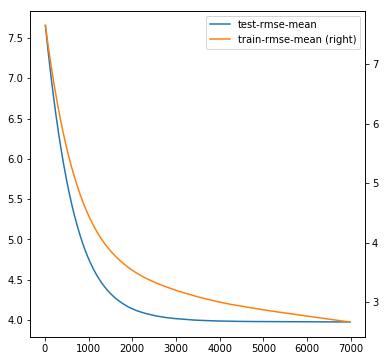

In [23]:
cv[10:].plot(figsize=(6, 6), y=['test-rmse-mean', 'train-rmse-mean'], secondary_y='train-rmse-mean')
print (cv.loc[cv['test-rmse-mean'].values.argmin()])
trees = cv['test-rmse-mean'].values.argmin()

In [26]:
params['n_estimators'] = trees

In [28]:
scores = []
feature_importances = []

kf = KFold(n_splits=5, shuffle=True, random_state=7777)

for train_index, valid_index in kf.split(df_clients_train):
    cl = XGBRegressor(**params)
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X_valid = df_clients_train.iloc[valid_index].loc[:, features_].values
    Y_valid = df_clients_train.iloc[valid_index].loc[:, target].values
    
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    
    feature_importances.append(cl.feature_importances_)
    scores.append(np.sqrt(mean_squared_error(Y_valid, Y_pred)))
    print scores[-1]
    
print "=" * 30
print "MEAN:", np.mean(scores)

3.922868578022114
4.080214113297541
3.839288109956336
4.101333639401798
3.830909872345797
MEAN: 3.954922862604717


Feature ranking:
[001] cl_id                                    0.0837697535753
[002] FF_trxday_std                            0.0230316184461
[003] FF_amount_log_POS_per_month              0.0213869400322
[004] FF_amount_balanced                       0.0208036489785
[005] FF_amount_POS_last_month_log             0.0149986324832
[006] FF_used_period_days                      0.0148973641917
[007] FF_num_trans_in_per_day                  0.013292488642
[008] FF_amount_out_log_per_day                0.0131248105317
[009] FF_mcc_top2_amount_mean_log              0.0118623394519
[010] FF_entry_day                             0.0117096770555
[011] FF_mcc_cat_5999_amount_log               0.0116776432842
[012] FF_amount_POS                            0.0115036563948
[013] FF_amount_out_log                        0.0112857073545
[014] FF_amount_log_POS_std                    0.010847943835
[015] FF_exit_day                              0.0108021339402
[016] FF_log_amount_POS_q0.25           

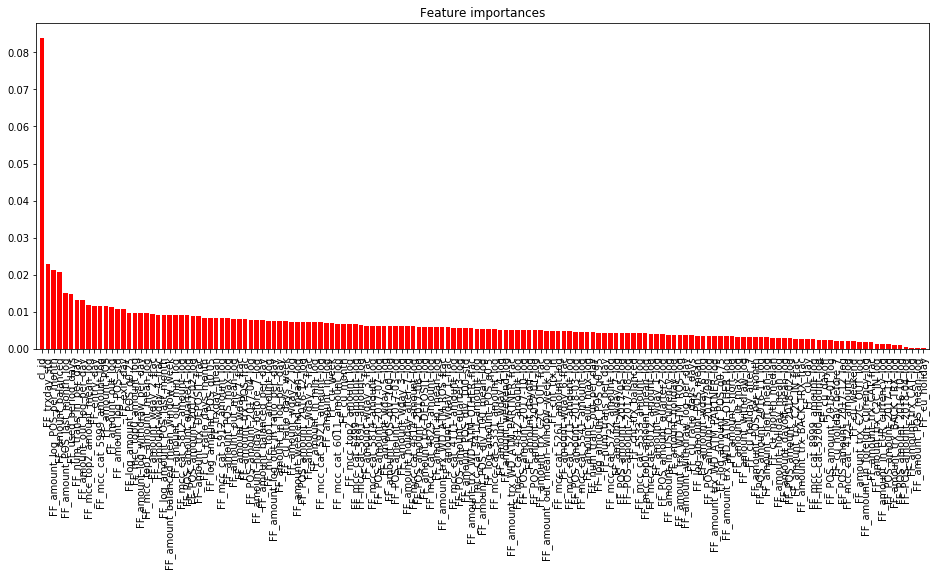

In [29]:
features_ = np.array(features_)

importances = np.mean(feature_importances, axis=0)
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1]

print "Feature ranking:"

n_features = len(features_)

for f in range(n_features):
    print "[{:03}] {:40} {}".format(f + 1, features_[indices[f]], importances[indices[f]])
    
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color="r", align="center")
plt.xticks(range(n_features), features_[indices], rotation='vertical')
plt.xlim([-1, n_features])
plt.show()

In [30]:
params_cl['xgb'] = params

In [ ]:
raise Exception()

In [38]:
mask = df_clients[target].isnull()
if use_positive_class:
    mask = np.logical_and(df_clients["Y_pred"] > 0.5, mask)
df_clients_test = df_clients.loc[mask]
df_clients_test.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
2,0.0,0.0,0.0,0.0,10.763,10.782968,11.231806,9.80669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.048980,9.806690,0.000000,0.0,189077.720000,7.503290,2.430098,18.467791,11.436245,12.149919,9.343997,6.986053,-319237.720000,-1882.561297,8.364275,6.978680,11.671427,11.408288,8.600799,6.809959,0.000000,...,10.475268,10.256703,7.296617,0.000000,7.003974,11.827013,0.000000,8.967632,10.256703,6.215616,10.475268,6.949839,9.637893,7.073726,0.033333,2.177778,2.211111,164.095477,24.412200,90,2,47269.430000,3.037480,22.500000,6.428571,1.363636,-0.116983,0.094044,-0.140983,0.131165,-3547.085778,0,NaN,NaN,0,0,0,0,0,0.955691
3,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,10.829107,10.699439,9.968908,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11.662636,0.000000,0.0,116148.770000,7.025538,2.735033,25.194535,10.842127,11.662636,9.679969,7.306590,-120848.770000,-1193.899641,7.917172,6.819288,11.446676,10.050225,7.917172,6.819288,0.000000,...,9.817330,8.884879,8.546379,4.960044,8.802522,10.707751,11.289794,0.000000,8.884879,5.796740,9.557136,7.073006,8.802522,6.724133,0.027027,1.270270,1.297297,276.197917,21.313509,74,3,38716.256667,3.887545,24.666667,6.727273,1.644444,-0.109553,0.151693,-0.164664,0.144699,-1633.091486,0,NaN,NaN,0,0,0,0,0,0.949928
4,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.663345,11.447611,12.224181,6.620073,12.605469,0.000000,0.000000,0.0,298183.982477,7.978996,3.043870,93.975564,12.220000,12.605469,11.632488,7.622349,-351133.982477,-2397.152556,9.934969,7.227597,12.380174,11.040348,9.220523,7.024090,9.483662,...,9.056609,9.713597,7.686676,7.648597,7.967973,10.855165,7.048386,8.963416,9.713597,6.219023,10.987075,7.942891,9.836118,7.197756,0.000000,2.590164,2.590164,508.411392,17.876480,61,4,74545.995619,3.151367,15.250000,6.777778,1.326087,-0.127689,0.000000,-0.209327,0.177954,-5756.294795,0,NaN,NaN,0,0,0,0,0,0.876383
6,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,11.073688,

In [39]:
X_test = df_clients_test.loc[:, features_].values

In [40]:
for f in ["FF_amount_POS_last_month_log", "FF_amount_POS_per_month_log"]:
    if f not in features_:
        sys.stderr.write('Feature {} IS NOT used!\n'.format(f))
    else:
        sys.stderr.write('Feature {} IS used!\n'.format(f))

Feature FF_amount_POS_last_month_log IS used!
Feature FF_amount_POS_per_month_log IS NOT used!


In [41]:
from sklearn.model_selection import train_test_split

In [43]:
scores, Y_pred_test = [], []

for seed in np.random.randint(100, 10000, 10):
    X_train, X_valid, Y_train, Y_valid = train_test_split(
        df_clients_train.loc[:, features_].values,
        df_clients_train.loc[:, target].values,
        test_size=0.2, random_state=seed)
    
    cl = XGBRegressor(**params_cl['xgb'])
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    scores.append(np.sqrt(mean_squared_error(Y_valid, Y_pred)))
    print "seed={:4d}; rmse={}".format(seed, scores[-1])
    
    Y_pred = np.clip(cl.predict(X_test), 0, None)
    Y_pred_test.append(Y_pred)
    
print "=" * 30
print "MEAN:", np.mean(scores)

Y_pred = np.mean(Y_pred_test, axis=0)
assert len(Y_pred) == df_clients_test.shape[0] 

seed=1042; rmse=4.02082970435
seed= 914; rmse=3.88081937048
seed=1234; rmse=4.01167215819
seed=9583; rmse=3.87721242011
seed=4345; rmse=4.0344279837
seed=6958; rmse=4.09768080584
seed=9802; rmse=3.89096685777
seed=1949; rmse=3.95541655365
seed=4586; rmse=3.91413190843
seed=3055; rmse=4.02666263029
MEAN: 3.970982039280596


In [44]:
df_pred = zip(df_clients_test["cl_id"], Y_pred)
df_pred = pd.DataFrame(df_pred, columns=['cl_id', 'pred'])
df_pred.head()

,cl_id,pred
0,2,10.073647
1,3,4.333760
2,4,9.528104
3,6,10.945134
4,7,8.566833


In [45]:
df_pred = pd.merge(
    pd.DataFrame(df_clients.loc[df_clients[target].isnull(), "cl_id"]),
    df_pred, how='left', on='cl_id'
)
df_pred["pred"].fillna(0.0, inplace=True)

assert (df_pred["pred"] >= 0).all()
assert df_pred.notnull().all().all()

In [46]:
df_pred["pred"] = np.exp(df_pred["pred"]) - 1.0
df_pred.sort_values(by="cl_id", inplace=True)
df_pred.head()

,cl_id,pred
0,2,23708.889038
1,3,75.230395
2,4,13739.511998
3,6,56676.589400
4,7,5253.465135


In [47]:
df_pred.to_csv('submission_09_regr-xgb-03.csv', sep=',', encoding='utf-8', index=False)

In [48]:
with open('features_08_regr-xgb-03.txt', mode='w') as f_features:
    for f in features:
        f_features.write(f + '\n')